In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\rohit\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### TotalCharges is of object type so need to convert into numeric datatype

In [7]:
## Employ the pd.to_numeric() function to convert the column to numeric values, 
## specifying errors='coerce' to handle empty strings gracefully
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df['TotalCharges'].dtype

dtype('float64')

In [10]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [11]:
## To check if it still contains any empty string
df['TotalCharges'].isna().any()

False

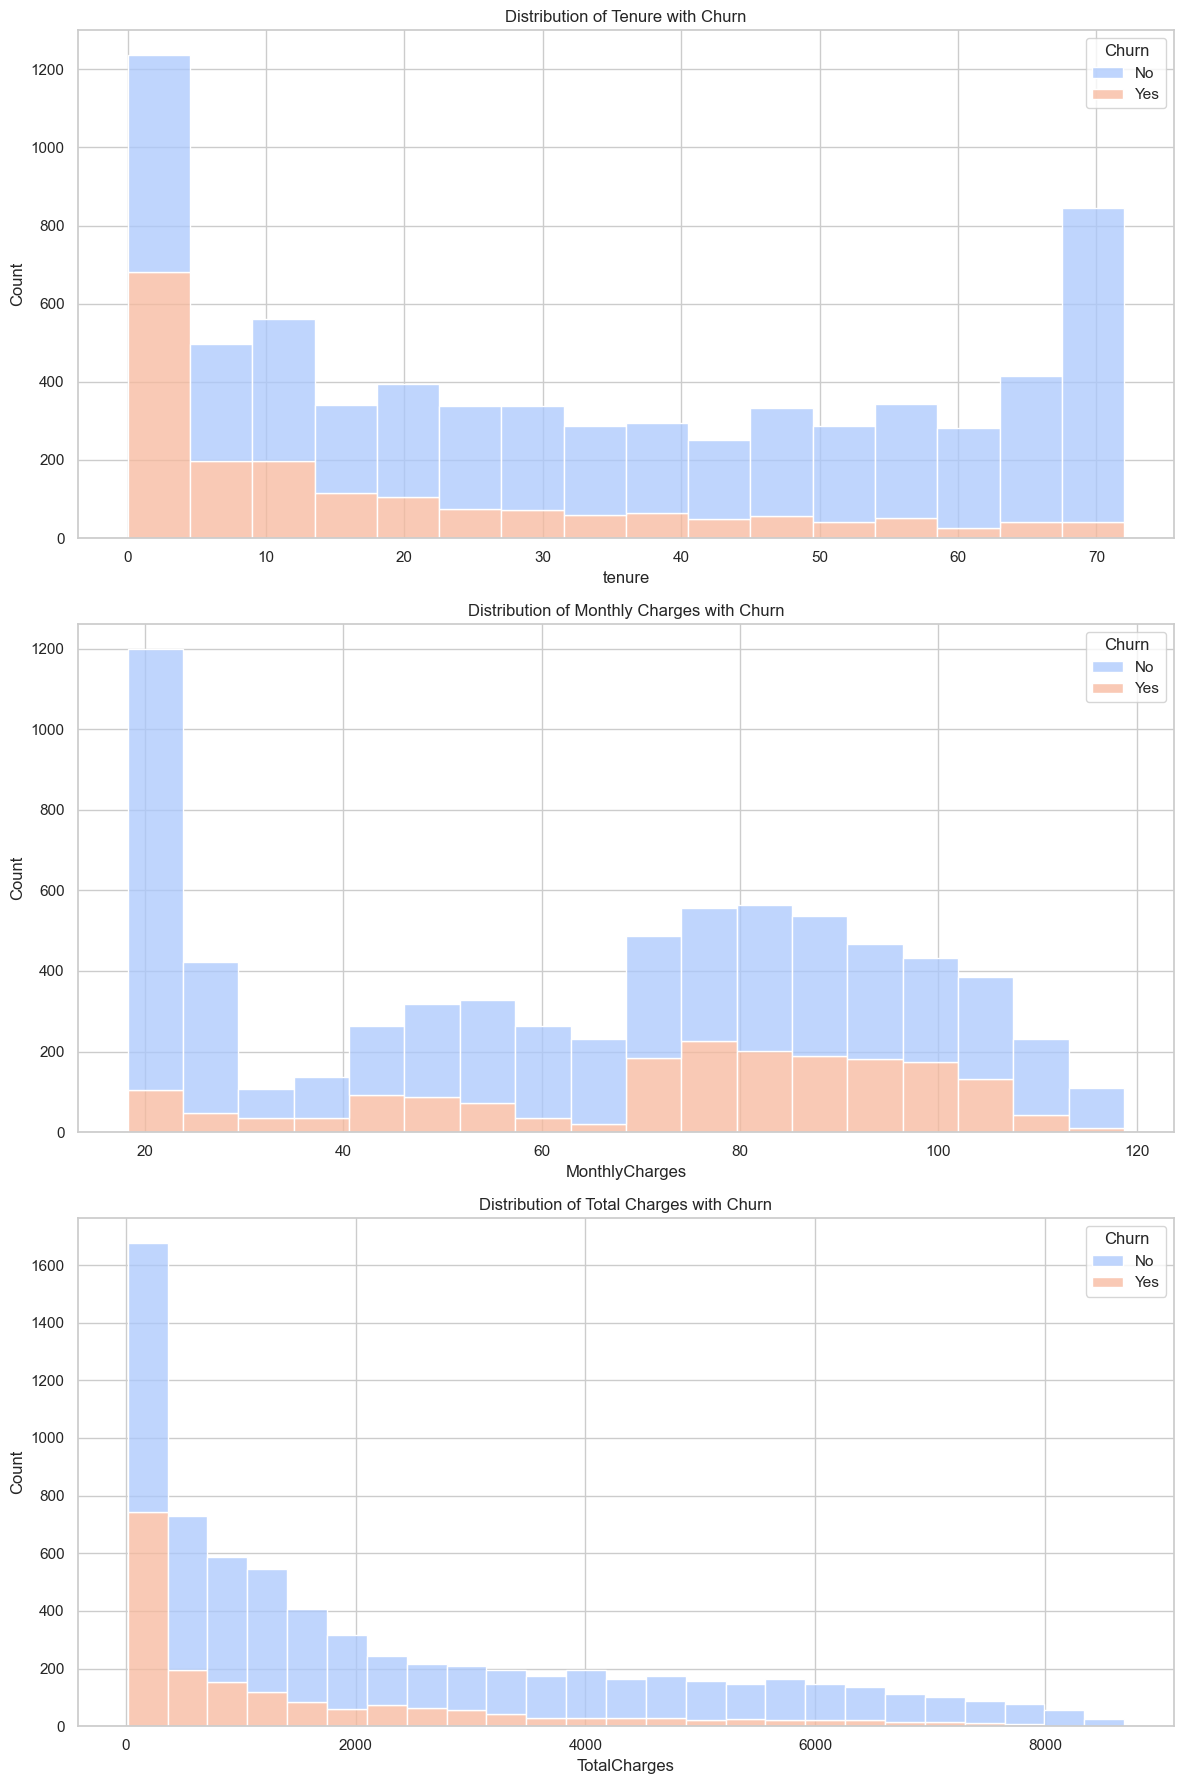

In [13]:
# Setting aesthetics for plots
sns.set(style="whitegrid")

# Creating subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Distribution of Tenure
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", ax=ax[0], palette="coolwarm")
ax[0].set_title('Distribution of Tenure with Churn')

# Distribution of MonthlyCharges
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack", ax=ax[1], palette="coolwarm")
ax[1].set_title('Distribution of Monthly Charges with Churn')

# Distribution of TotalCharges
sns.histplot(data=df, x="TotalCharges", hue="Churn", multiple="stack", ax=ax[2], palette="coolwarm")
ax[2].set_title('Distribution of Total Charges with Churn')

plt.tight_layout()
plt.show()

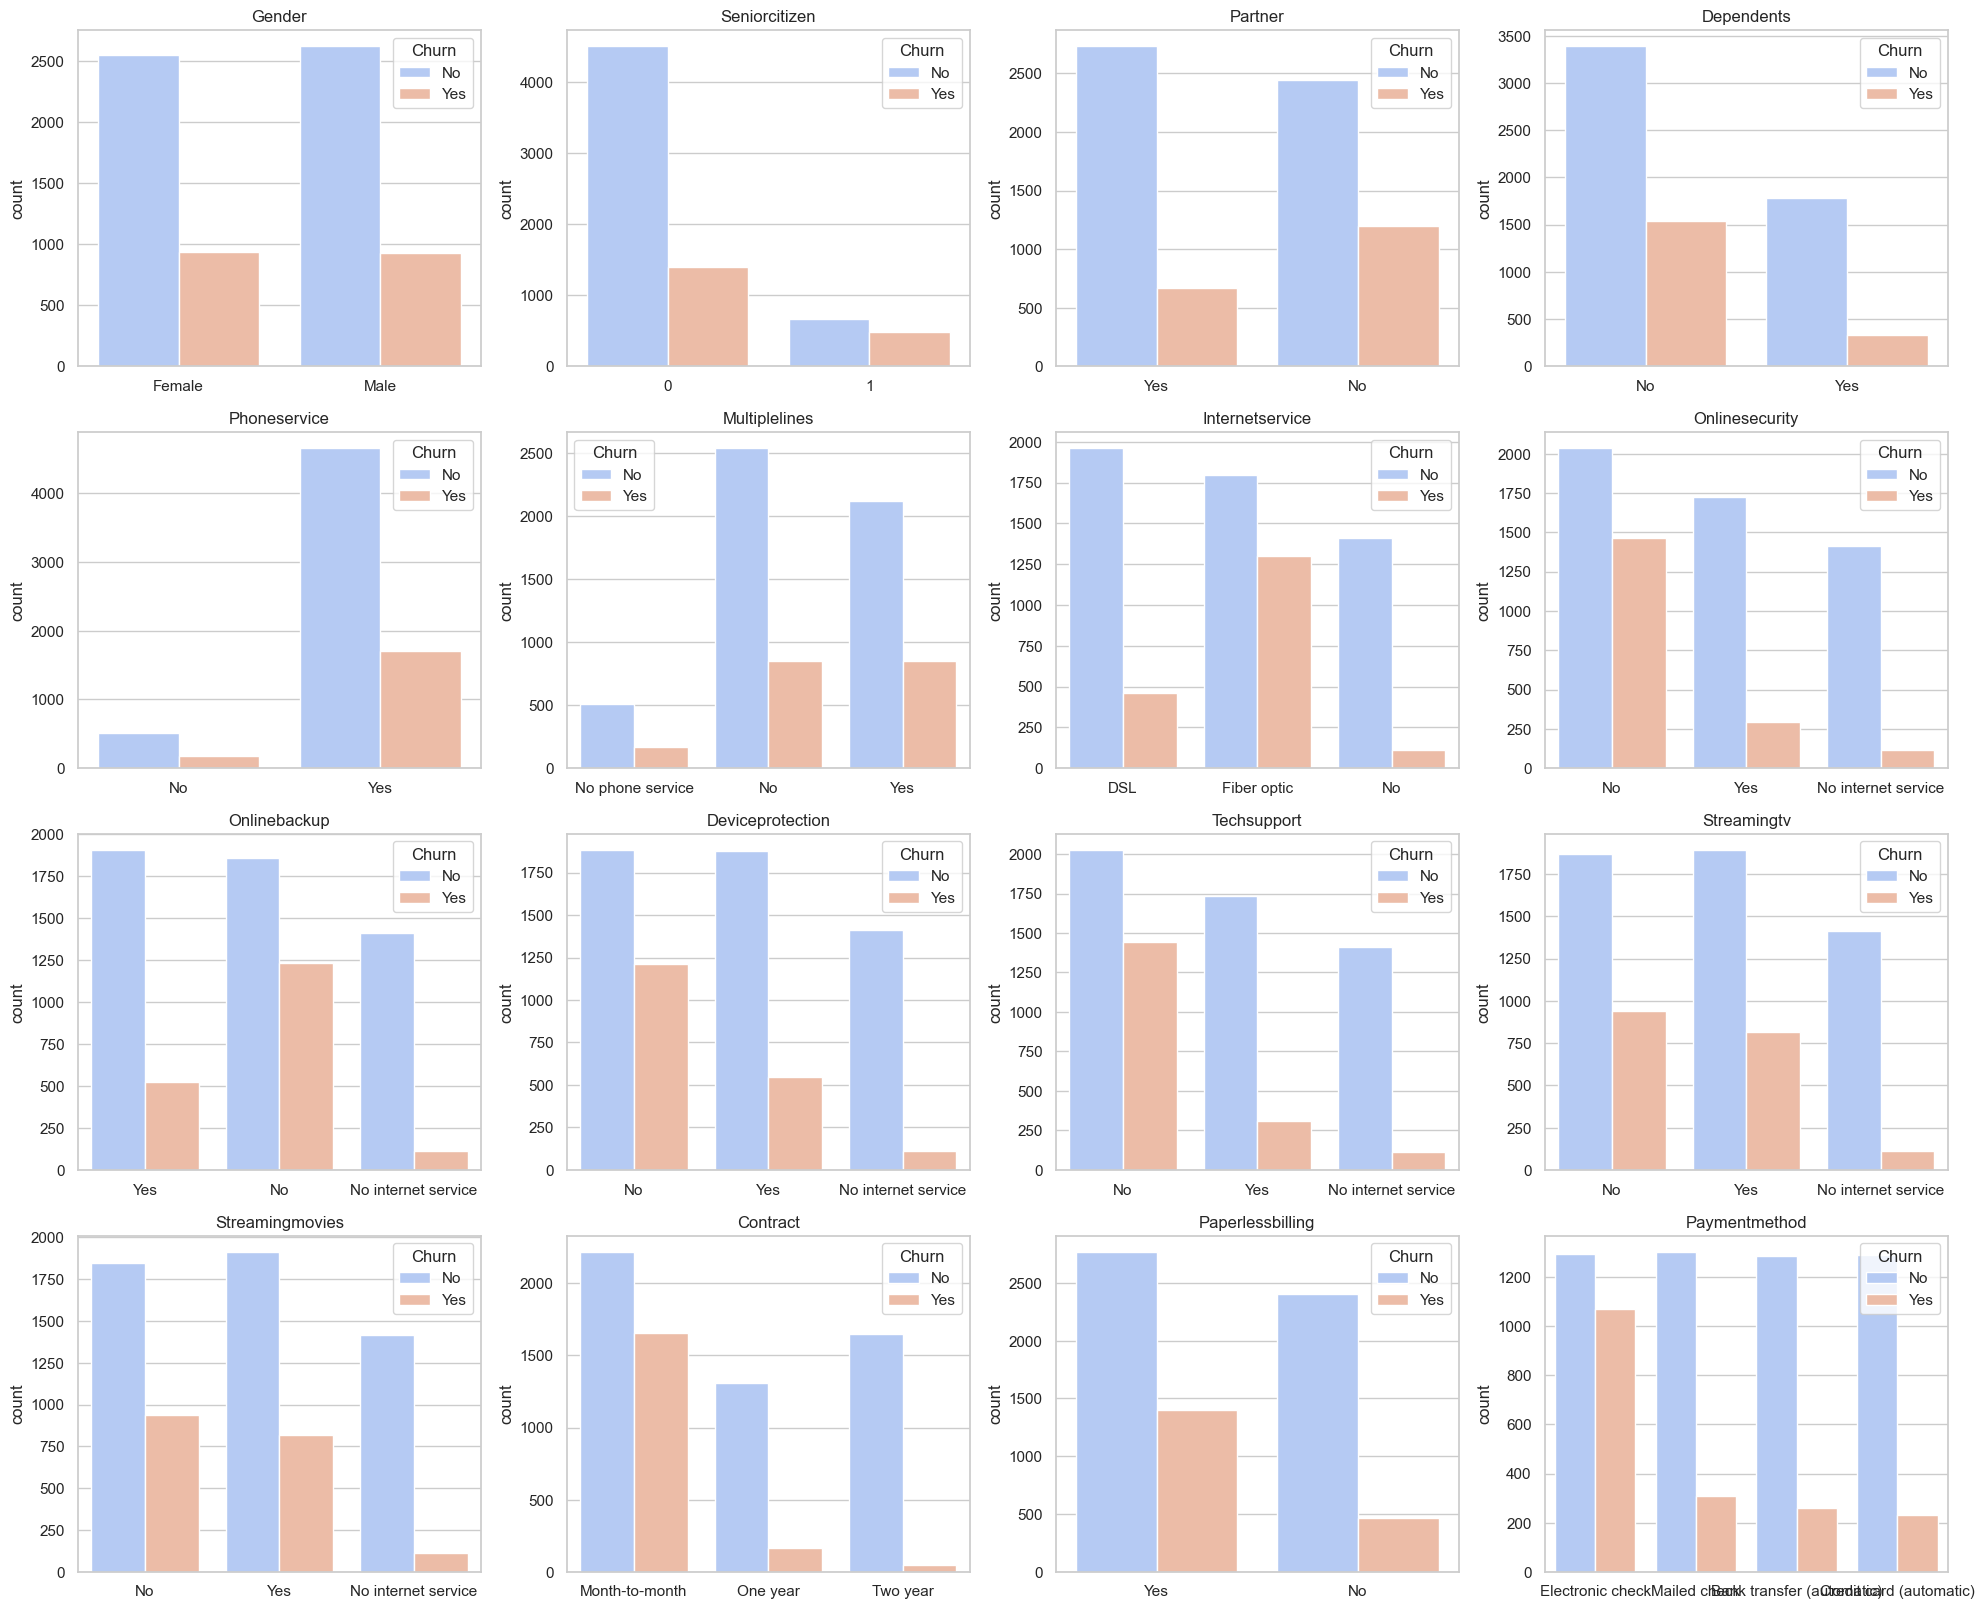

In [14]:
# List of categorical columns except for customerID
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Setting up the matplotlib figure (making a larger plot area)
plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=column, hue="Churn", data=df, palette="coolwarm")
    plt.title(column.replace("_", " ").title())
    plt.xlabel('')
    plt.tight_layout()

plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature Engineering: For this example, we'll keep it simple and not add new features,
# but focus on preparing existing features for modeling.

# Identify categorical and numerical columns (excluding customerID as it's not useful for modeling)
categorical_features = df.select_dtypes(include=['object']).drop(['customerID', 'Churn'], axis=1).columns.tolist()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Encoding categorical variables using OneHotEncoder and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Prepare target variable by encoding Yes/No to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Splitting the data into training and testing sets
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Shape of prepared data
(X_train.shape, X_test.shape)

((5634, 44), (1409, 44))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initializing models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# List of models
models = [('Logistic Regression', logreg), ('Random Forest', rf), ('Gradient Boosting', gb)]

# Training and evaluating models
results = []
for name, model in models:
    # Training model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    
    # Evaluating model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results.append((name, accuracy, roc_auc, report))

print(results)

[('Logistic Regression', 0.8183108587650816, 0.7494850269649196, '              precision    recall  f1-score   support\n\n           0       0.86      0.90      0.88      1036\n           1       0.68      0.60      0.64       373\n\n    accuracy                           0.82      1409\n   macro avg       0.77      0.75      0.76      1409\nweighted avg       0.81      0.82      0.81      1409\n'), ('Random Forest', 0.794180269694819, 0.6910407630917014, '              precision    recall  f1-score   support\n\n           0       0.83      0.91      0.87      1036\n           1       0.65      0.47      0.55       373\n\n    accuracy                           0.79      1409\n   macro avg       0.74      0.69      0.71      1409\nweighted avg       0.78      0.79      0.78      1409\n'), ('Gradient Boosting', 0.8069552874378992, 0.7194587348742846, '              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.87      1036\n           1       0.67  

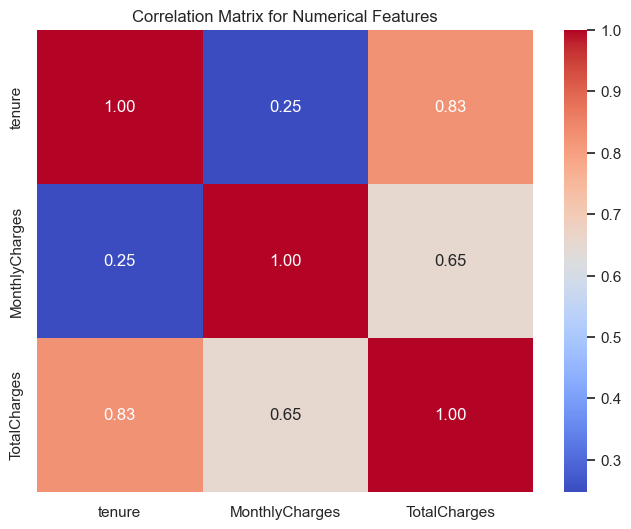

In [24]:
# Calculating correlation matrix for numerical features
numerical_corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

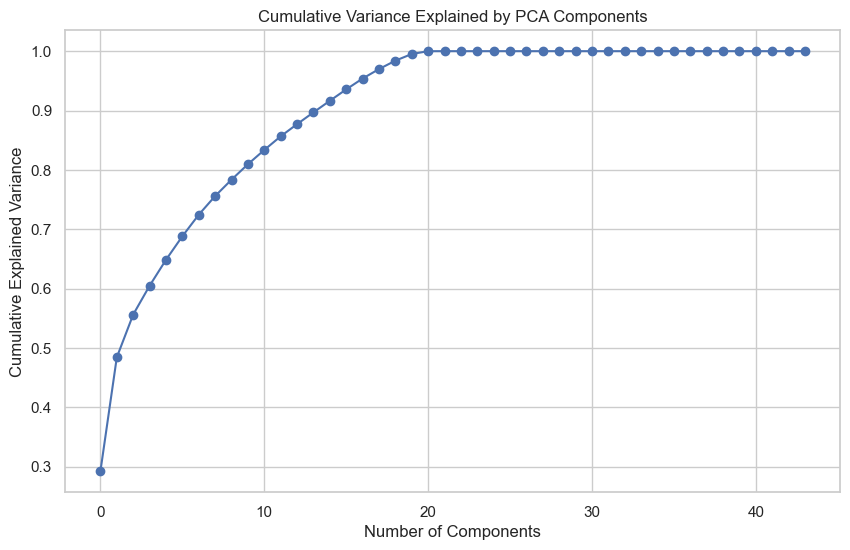

[15, 17, 20]

In [25]:
from sklearn.decomposition import PCA
import numpy as np

# Fitting PCA
pca = PCA().fit(X_train)

# Cumulative variance explained by the PCA components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Returning the number of components explaining various thresholds of variance (90%, 95%, 99%)
variance_thresholds = [0.9, 0.95, 0.99]
components_needed = [np.argmax(cumulative_variance >= threshold) + 1 for threshold in variance_thresholds]

components_needed

In [26]:
# Applying PCA with 17 components
pca_17 = PCA(n_components=17)
X_train_pca = pca_17.fit_transform(X_train)
X_test_pca = pca_17.transform(X_test)

# Re-initializing and training models on the PCA-transformed data
results_pca = []
for name, model in models:
    # Training model
    model.fit(X_train_pca, y_train)
    
    # Making predictions
    y_pred_pca = model.predict(X_test_pca)
    
    # Evaluating model
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    roc_auc_pca = roc_auc_score(y_test, y_pred_pca)
    report_pca = classification_report(y_test, y_pred_pca)
    
    results_pca.append((name, accuracy_pca, roc_auc_pca, report_pca))

results_pca

[('Logistic Regression',
  0.8183108587650816,
  0.7400485989628081,
  '              precision    recall  f1-score   support\n\n           0       0.86      0.91      0.88      1036\n           1       0.69      0.57      0.63       373\n\n    accuracy                           0.82      1409\n   macro avg       0.77      0.74      0.75      1409\nweighted avg       0.81      0.82      0.81      1409\n'),
 ('Random Forest',
  0.794889992902768,
  0.6889498173010238,
  '              precision    recall  f1-score   support\n\n           0       0.83      0.91      0.87      1036\n           1       0.66      0.46      0.54       373\n\n    accuracy                           0.79      1409\n   macro avg       0.74      0.69      0.71      1409\nweighted avg       0.78      0.79      0.78      1409\n'),
 ('Gradient Boosting',
  0.8133427963094393,
  0.7195130787624084,
  '              precision    recall  f1-score   support\n\n           0       0.84      0.92      0.88      1036\n     

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initializing the XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Defining a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# Setting up the grid search with 5-fold cross-validation
grid_cv = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit grid search
best_model = grid_cv.fit(X_train_pca, y_train)

# Best parameters and best score
best_params = best_model.best_params_
best_score = best_model.best_score_

(best_params, best_score)

C:\Users\rohit\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\rohit\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


({'colsample_bytree': 1,
  'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 50,
  'subsample': 0.8},
 0.8004969259307707)

In [32]:
# Re-initializing XGBoost with typical parameters
# These parameters are obtained from hyperparameter tuning
xgb_final = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Training the model on PCA-transformed data
xgb_final.fit(X_train_pca, y_train)

# Making predictions
y_pred_final = xgb_final.predict(X_test_pca)

# Evaluating model
accuracy_final = accuracy_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final)

print(accuracy_final, roc_auc_final)
print(report_final)

0.8140525195173882 0.717422132971731
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



C:\Users\rohit\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
